In [20]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import pandas as pd
import numpy as np
from adjustText import adjust_text
import matplotlib.pylab as plt

In [21]:
data = pd.read_csv("data_adj/counts_matrix.tsv", sep="\t")
data = data.set_index(data["gene_id"])
data = data.drop('gene_id', axis=1)

In [22]:
data.head()

,C2C12_0_f_1,C2C12_0_f_2,gastroc_PND04_f_1,gastroc_PND04_f_2,gastroc_PND04_m_1,gastroc_PND04_m_2,gastroc_PND10_f_1,gastroc_PND10_f_2,gastroc_PND10_m_1,gastroc_PND10_m_2,...,skeletal muscle tissue_PND0_na_1,skeletal muscle tissue_PND0_na_1.1,skeletal muscle tissue_PND0_na_2,skeletal muscle tissue_PND0_na_2.1,C2C12_0_f_1.1,C2C12_0_f_2.1,C2C12_0_f_2.2,myotube_72_f_1.1,myotube_72_f_2.1,myotube_72_f_2.2
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000099183.1,12,4,2,4,1,8,3,8,9,4,...,1,14,4,10,0,0,1,6,2,4
ENSMUSG00000065559.1,70786,15451,720323,517475,652657,101,407082,376268,402312,442713,...,298316,852425,447669,1305418,27143,24389,27329,1074677,1300194,1256891
ENSMUSG00000065480.1,2433,306,444,373,427,10,96,135,174,173,...,2556,6690,4440,8902,334,359,1088,26475,26033,21244
ENSMUSG00000065405.3,223146,132440,26029,16861,16800,17258,21166,28472,20710,25686,...,17696,45908,20188,32248,125913,135138,120392,27729,28878,25335
ENSMUSG00000065567.1,5289,1440,213,240,186,1986,239,277,298,421,...,51,135,87,197,2074,1710,2018,517,529,416


In [23]:
metadata = pd.read_csv("data_adj/metadata.tsv", sep="\t",
                      usecols=["File.accession", "Biosample.term.name", "Age", "sample_mrna"])

In [24]:
# Filter metadata DataFrame based on matching samples in merged_df
metadata_filtered = metadata[metadata['sample_mrna'].isin(data.columns)].copy()

# Sort filtered_metadata based on the order of columns in merged_df
metadata_filtered['sample_mrna'] = pd.Categorical(metadata_filtered['sample_mrna'], categories=data.columns)
metadata_filtered.sort_values('sample_mrna', inplace=True)

In [25]:
filtering = {'Biosample.term.name': ['C2C12', 'myotube'],#,'gastroc? skeletal muscle? idk'],
             'Age': ["0","72"]}
group = 'Age' # change to the group you're interested in making the comparison in

In [26]:
metadata_selected = metadata_filtered.copy(deep=True)

In [27]:
for col in filtering.keys():
    metadata_selected = metadata_selected[metadata_selected[col].isin(filtering[col])]

In [28]:
metadata_selected

,File.accession,Biosample.term.name,Age,sample_mrna
0,ENCFF784UWQ,C2C12,0,C2C12_0_f_1
51,Ctrl_0hr_A_new,C2C12,0,C2C12_0_f_1
52,Ctrl_0hr_B_new,C2C12,0,C2C12_0_f_2
1,ENCFF094EFP,C2C12,0,C2C12_0_f_2
53,Ctrl_0hr_C_new,C2C12,0,C2C12_0_f_2
45,ENCFF767VQY,myotube,72,myotube_72_f_1
54,Ctrl_72hr_A_new,myotube,72,myotube_72_f_1
46,ENCFF892ZEY,myotube,72,myotube_72_f_2
55,Ctrl_72hr_B_new,myotube,72,myotube_72_f_2
56,Ctrl_72hr_C_new,myotube,72,myotube_72_f_2


In [29]:
metadata_selected.index = metadata_selected['sample_mrna']
data_selected = data.loc[:, metadata_selected['sample_mrna']]

In [30]:
data_selected

,C2C12_0_f_1,C2C12_0_f_1,C2C12_0_f_2,C2C12_0_f_2,C2C12_0_f_2,myotube_72_f_1,myotube_72_f_1,myotube_72_f_2,myotube_72_f_2,myotube_72_f_2
gene_id,,,,,,,,,,
ENSMUSG00000099183.1,12,12,4,4,4,12,12,19,19,19
ENSMUSG00000065559.1,70786,70786,15451,15451,15451,2584038,2584038,4111798,4111798,4111798
ENSMUSG00000065480.1,2433,2433,306,306,306,103180,103180,104254,104254,104254
ENSMUSG00000065405.3,223146,223146,132440,132440,132440,46398,46398,64996,64996,64996
ENSMUSG00000065567.1,5289,5289,1440,1440,1440,535,535,812,812,812
...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000099172.1,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000093219.1,13,13,3,3,3,8,8,23,23,23
ENSMUSG00000065602.1,57897,57897,15115,15115,15115,3302,3302,1277,1277,1277


In [31]:
metadata_selected

,File.accession,Biosample.term.name,Age,sample_mrna
sample_mrna,,,,
C2C12_0_f_1,ENCFF784UWQ,C2C12,0,C2C12_0_f_1
C2C12_0_f_1,Ctrl_0hr_A_new,C2C12,0,C2C12_0_f_1
C2C12_0_f_2,Ctrl_0hr_B_new,C2C12,0,C2C12_0_f_2
C2C12_0_f_2,ENCFF094EFP,C2C12,0,C2C12_0_f_2
C2C12_0_f_2,Ctrl_0hr_C_new,C2C12,0,C2C12_0_f_2
myotube_72_f_1,ENCFF767VQY,myotube,72,myotube_72_f_1
myotube_72_f_1,Ctrl_72hr_A_new,myotube,72,myotube_72_f_1
myotube_72_f_2,ENCFF892ZEY,myotube,72,myotube_72_f_2
myotube_72_f_2,Ctrl_72hr_B_new,myotube,72,myotube_72_f_2


In [32]:
dds = DeseqDataSet(
    counts=data_selected.T,
    clinical=metadata_selected,
    design_factors=group,
    refit_cooks=True)

dds.deseq2()
stat_res = DeseqStats(dds, 
                      contrast=[group] + filtering[group])
stat_res.summary()

Fitting size factors...
... done in 0.00 seconds.



/opt/apps/python/3.8.0/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Fitting dispersions...
... done in 6.49 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 5.14 seconds.

Fitting LFCs...
... done in 1.54 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 0.95 seconds.

Log2 fold change & Wald test p-value: Age 0 vs 72


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSMUSG00000099183.1,1.358905e+01,-2.542535,0.288984,-8.798188,1.390431e-18,1.309173e-17
ENSMUSG00000065559.1,2.505246e+06,-8.041320,0.153876,-52.258374,0.000000e+00,0.000000e+00
ENSMUSG00000065480.1,7.615564e+04,-8.211611,0.320290,-25.638069,5.743992e-145,2.602746e-143
ENSMUSG00000065405.3,9.729009e+04,0.438308,0.217832,2.012143,4.420491e-02,7.893734e-02
ENSMUSG00000065567.1,1.297987e+03,0.669696,0.081839,8.183059,2.767278e-16,2.388424e-15
...,...,...,...,...,...,...
ENSMUSG00000099172.1,0.000000e+00,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000093219.1,1.358807e+01,-2.656595,0.363384,-7.310718,2.657182e-13,1.907383e-12
ENSMUSG00000065602.1,1.013327e+04,2.401759,0.396433,6.058415,1.374692e-09,7.328322e-09


In [42]:
l2fc_cutoff = 2 # Log 2 fold change; usually 0.5 - 2
pval_cutoff = 0.05 # 0.01 is even better than 0.05

In [43]:
annot = pd.read_csv("/data/class/cosmos2023/PUBLIC/ref/homo_sapiens/transcripts_to_genes.txt",sep="\t",header=None)
annot = pd.read_csv("/data/class/cosmos2023/PUBLIC/ref/homo_sapiens/transcripts_to_genes.txt",sep="\t",
                    header=None,names=['transcript_id', 'gene_id', 'gene_name'])

annot = annot[["gene_id", "gene_name"]]
annot = annot.drop_duplicates()


In [64]:
df = stat_res.results_df.copy(deep=True)

In [65]:
# Find the machine-specific lowest non-zero value
lowest_nonzero_value = df['padj'][df['padj'] > 0].min()

# Replace 0 with the lowest non-zero value
df['padj'] = np.where(df['padj'] == 0, lowest_nonzero_value, df['padj'])

df = df.dropna()
#I'm assuming we might not be able to use the annotations? when it was merged, none of gene names mapped on
#df = df.merge(annot, left_index=True, right_on='gene_id')
df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSMUSG00000099183.1,1.358905e+01,-2.542535,0.288984,-8.798188,1.390431e-18,1.309173e-17
ENSMUSG00000065559.1,2.505246e+06,-8.041320,0.153876,-52.258374,0.000000e+00,2.084722e-284
ENSMUSG00000065480.1,7.615564e+04,-8.211611,0.320290,-25.638069,5.743992e-145,2.602746e-143
ENSMUSG00000065405.3,9.729009e+04,0.438308,0.217832,2.012143,4.420491e-02,7.893734e-02
ENSMUSG00000065567.1,1.297987e+03,0.669696,0.081839,8.183059,2.767278e-16,2.388424e-15
...,...,...,...,...,...,...
ENSMUSG00000076011.1,1.375707e+04,0.816626,0.205047,3.982634,6.815565e-05,2.176777e-04
ENSMUSG00000080331.1,5.936084e-01,-0.637355,1.434047,-0.444445,6.567211e-01,7.246922e-01
ENSMUSG00000093219.1,1.358807e+01,-2.656595,0.363384,-7.310718,2.657182e-13,1.907383e-12


In [69]:
# Calculate -log10(padj)
df['nlog10padj'] = -np.log10(df['padj'])

# Add labels to DE column based on our cutoffs above
df['DE'] = "No"
df.DE[np.logical_and(df.padj < pval_cutoff, df.log2FoldChange > l2fc_cutoff)] = "Up"
df.DE[np.logical_and(df.padj < pval_cutoff, df.log2FoldChange < -l2fc_cutoff)] = "Down"

/tmp/ipykernel_829035/1959988433.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.DE[np.logical_and(df.padj < pval_cutoff, df.log2FoldChange > l2fc_cutoff)] = "Up"
/tmp/ipykernel_829035/1959988433.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.DE[np.logical_and(df.padj < pval_cutoff, df.log2FoldChange < -l2fc_cutoff)] = "Down"


In [78]:
up

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,nlog10padj,DE,label
gene_id,,,,,,,,,
ENSMUSG00000065471.1,35490.472656,3.446975,0.042522,81.062928,0.000000e+00,2.084722e-284,283.680952,Up,ENSMUSG00000065471.1
ENSMUSG00000065604.2,1066.648438,4.657865,0.087424,53.279252,0.000000e+00,2.084722e-284,283.680952,Up,ENSMUSG00000065604.2
ENSMUSG00000076062.1,19596.041016,2.833352,0.031999,88.546043,0.000000e+00,2.084722e-284,283.680952,Up,ENSMUSG00000076062.1
ENSMUSG00000076959.1,375.929688,3.201206,0.102051,31.368772,5.397006e-216,3.009869e-214,213.521452,Up,ENSMUSG00000076959.1
ENSMUSG00000065613.1,243.610718,2.784537,0.110527,25.193276,4.746415e-140,2.024206e-138,137.693745,Up,ENSMUSG00000065613.1
...,...,...,...,...,...,...,...,...,...
ENSMUSG00000065500.3,1.839287,3.724341,1.585513,2.348983,1.882479e-02,3.739171e-02,1.427225,Up,ENSMUSG00000065500.3
ENSMUSG00000096624.1,1.807123,3.863175,1.644439,2.349235,1.881203e-02,3.739171e-02,1.427225,Up,ENSMUSG00000096624.1
ENSMUSG00000093508.1,1.593118,3.585044,1.590546,2.253970,2.419804e-02,4.653469e-02,1.332223,Up,ENSMUSG00000093508.1


/tmp/ipykernel_829035/1025102479.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.label[df.DE == "No"] = ""
/tmp/ipykernel_829035/1025102479.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  down.sort_values(["padj"], inplace=True)
/tmp/ipykernel_829035/1025102479.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up.sort_values(["padj"], inplace=True)


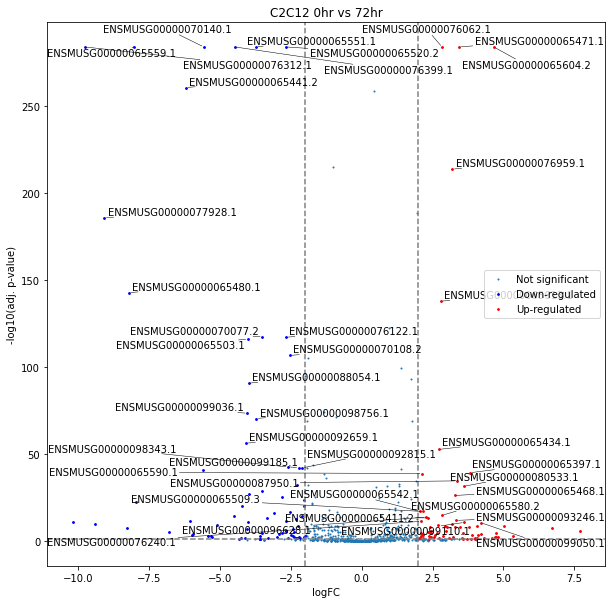

In [82]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

df['label'] = df.index
df.label[df.DE == "No"] = ""

# Create the figure
fig, ax = plt.subplots()

# Set the figure size
fig.set_size_inches(10, 10)

# Plot whole df first (with small size dots)
ax.scatter(x=df['log2FoldChange'], y=df['nlog10padj'], s=1, label="Not significant")

# Highlight up- or down-regulated genes
down = df[df.DE == "Down"]
down.sort_values(["padj"], inplace=True)
up = df[df.DE == "Up"]
up.sort_values(["padj"], inplace=True)

# Overlay up- and down-regulated gene dfs with larger label and specific color
ax.scatter(x=down['log2FoldChange'], y=down['nlog10padj'], s=3, label="Down-regulated", color="blue")
ax.scatter(x=up['log2FoldChange'], y=up['nlog10padj'], s=3, label="Up-regulated", color="red")

# Display names of top 20 up- or down-regulated genes
n_genes = 20
texts = []
for i in range(min(n_genes, up.shape[0])):
    texts.append(ax.text(x=up.iloc[i, 1],
                         y=up.iloc[i, 6],
                         s=up.iloc[i, 8]))
for i in range(min(n_genes, down.shape[0])):
    texts.append(ax.text(x=down.iloc[i, 1],
                         y=down.iloc[i, 6],
                         s=down.iloc[i, 8]))
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

# Draw lines indicating lfc and padj cutoffs
ax.set_xlabel("logFC")
ax.set_ylabel("-log10(adj. p-value)")
ax.axvline(l2fc_cutoff, color="grey", linestyle="--")
ax.axvline(-l2fc_cutoff, color="grey", linestyle="--")
ax.axhline(-np.log10(pval_cutoff), color="grey", linestyle="--")

# Draw legend
ax.legend()

# Add a title to the plot
ax.set_title("C2C12 0hr vs 72hr")

# Save the plot as a high-resolution PNG with specific width and height
output_file = "volcano_c2c12.png"
plt.savefig(output_file, dpi=300)

# Show the plot
plt.show()